In [97]:
file1 = 'https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv'
file2 = 'https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv'
file3 = 'https://assets.datacamp.com/production/repositories/469/datasets/7507bfed990379f246b4f166ea8a57ecf31c6c9d/belmont.csv'
file4 = 'https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Graphical EDA Overview

### Bee Swarm Plot

In [ ]:
iris.feature_names + ['species']

In [ ]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv', 
                      names = iris.feature_names + ['species'])

In [ ]:
iris_df

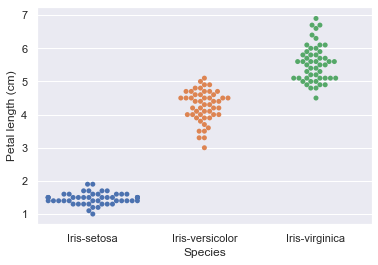

In [43]:
sns.set()
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x = 'species', y = 'petal length (cm)', data = iris_df)

# Label the axes
_ = plt.xlabel('Species')
_ = plt.ylabel('Petal length (cm)')

# Show the plot
plt.show()

### Cumulative Distribution Function 

Recall that CDF is the probability that a randomly drawn observation has feature value <= x. 

Let's create a function that helps us set up variables for ECDF in one go. 

In [66]:
versicolor_petal_length = np.asarray(iris_df.loc[iris_df['species'] == 'Iris-versicolor', 'petal length (cm)'])
setosa_petal_length = np.asarray(iris_df.loc[iris_df['species'] == 'Iris-setosa', 'petal length (cm)'])
virginica_petal_length = np.asarray(iris_df.loc[iris_df['species'] == 'Iris-virginica', 'petal length (cm)'])

In [63]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

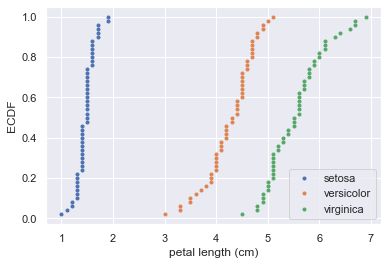

In [67]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

# 2. Quantitative EDA

### Mean and Median

In [69]:
# Compute the mean
mean_length_vers = np.mean(versicolor_petal_length)
median_length_vers = np.median(versicolor_petal_length)

# Print the results with some nice formatting
print('I. versicolor mean:', mean_length_vers, 'cm')
print('I. versicolor median:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


### Percentiles

In [71]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


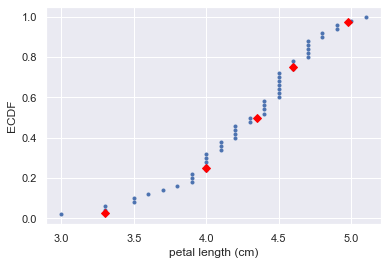

In [72]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


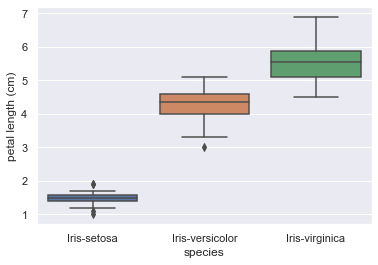

In [74]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=iris_df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


### Variance and SD

Recall Variance is average of the squared distance from the mean. Informally, it is the measure of the spread of data. 

Because variance involves squared quantities, the units are not on the same scale as actual observations. We square root it, hence SD. SD is a reasonable measurement of typical spread of data. 

In [75]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


In [76]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


### Covariance and Pearson Correlation Coefficient

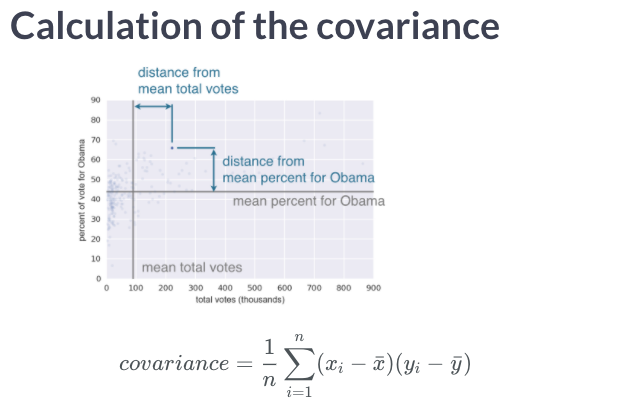

Covariance is the mean of the product of differences from x and y means. 

Covariance will be positive if x and y both tend to be above or below their respective means. This means correlation would also be positive. 

Conversely, if x tends to be above and y below their respective means, then covariance is negative and subsequently, correlation will also be negative. 

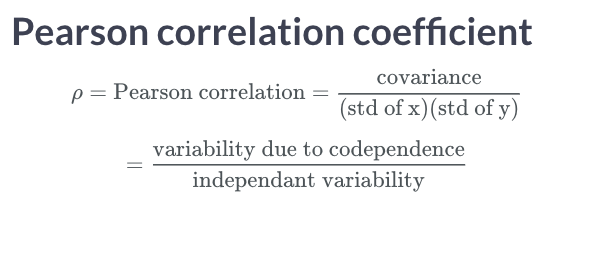

In [78]:
versicolor_petal_width = np.asarray(iris_df.loc[iris_df['species'] == 'Iris-versicolor', 'petal width (cm)'])

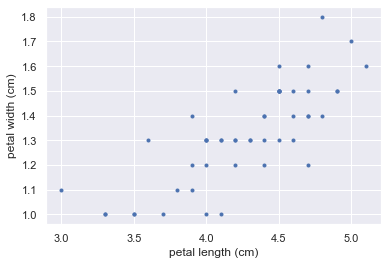

In [79]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width,
             marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()


The **covariance** may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [80]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [83]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


# 3. Thinking Probabilistically - Discrete Variables

### Using hacker stats to simulate data

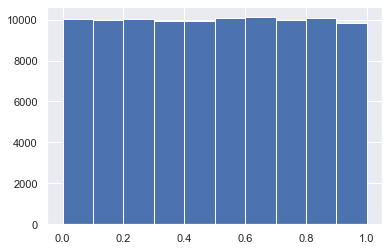

In [84]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


### The np.random module and Bernoulli trials

In [85]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

Let's say we want to expectations of defaults in a bank, given that the probability of a default is 0.05. We will perform 100 bernoulli trials 1000 times and compute number of defaults for each of the 1000 times. In the function, if the random number generated is less than 0.05, that means that that trial defaulted. 

/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


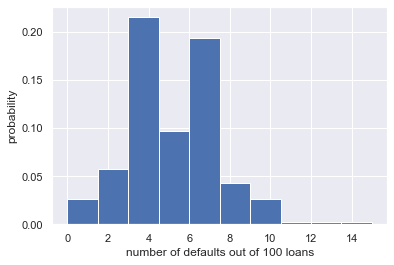

In [86]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

Now if the interest rates are set in such a way that the bank will lose money if there are more than 10 people default, what is the probability of that happening. 

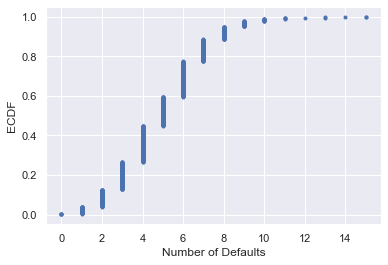

Probability of losing money = 0.022


In [87]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Number of Defaults')
plt.ylabel('ECDF')


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


There is a 2.2% chance that more than 10 defaulters will be there, resulting in loss of money for the bank. 

What we have plotted above is a binomial CDF.

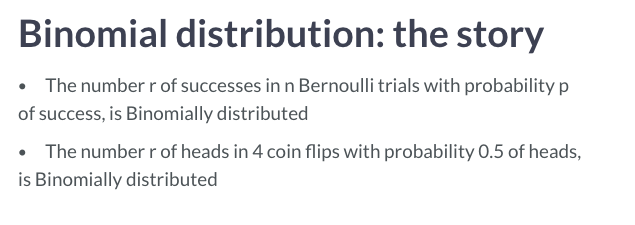

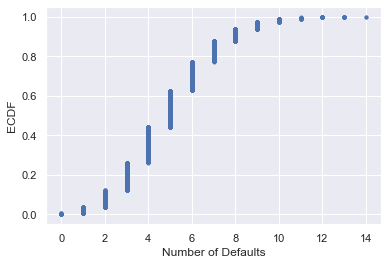

In [88]:
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size = 10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Number of Defaults')
plt.ylabel('ECDF')

# Show the plot
plt.show()


A binomial PMF is hard to compute on matplotlib. It's easier to make a histogram instead. 

/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


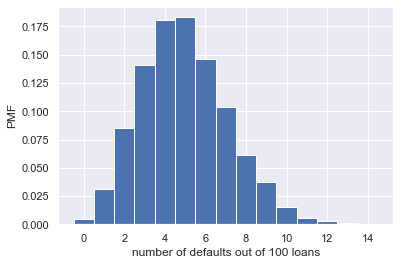

In [90]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, normed=True, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

### Poisson Process and Distribution

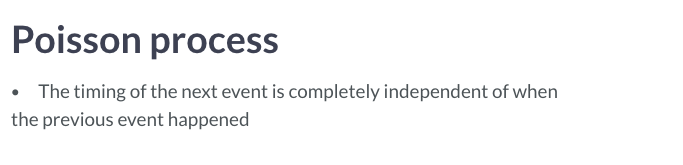

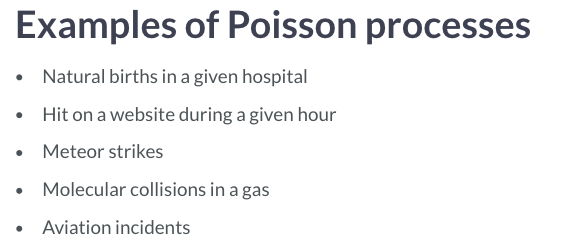

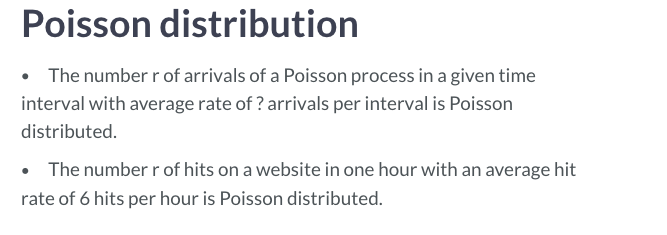

### Poisson distribution looks quite similar to binomial distribution. Why?

m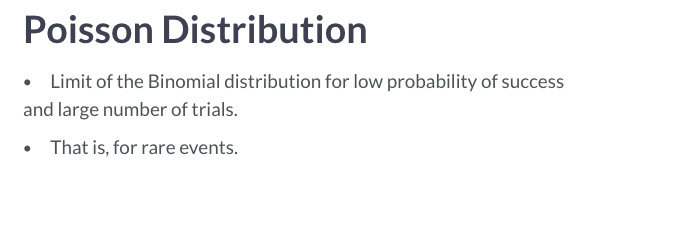

In [92]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))



Poisson:      9.9732 3.1276319732347027
n = 20 Binom: 9.9999 2.243858282066851
n = 100 Binom: 9.9957 2.998346462635698
n = 1000 Binom: 9.997 3.124162447761


IMPORTANT: The means are all about the same.e The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

In [93]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0067


# 4. Thinking Probabilistically: Continuous Variables

### Probability Density Functions - 

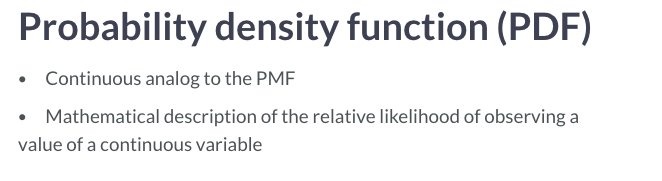


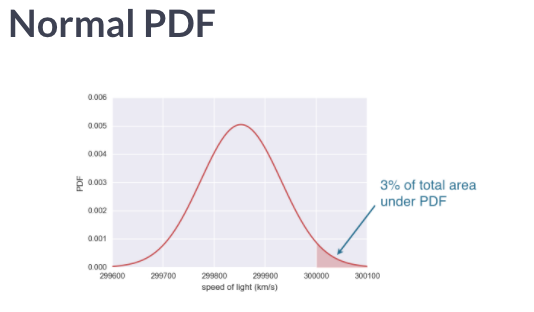

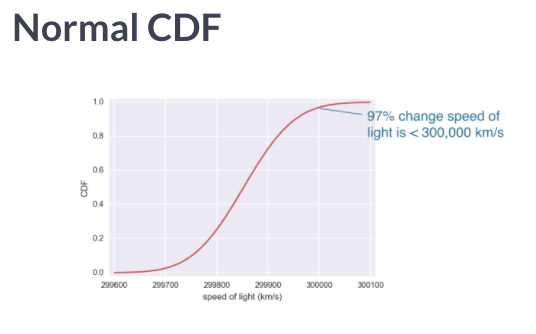

####  Example

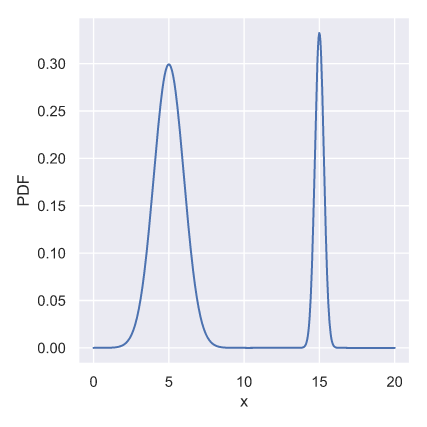

The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right. Therefore, x  is more likely to be less than 10 than to be greater than 10.

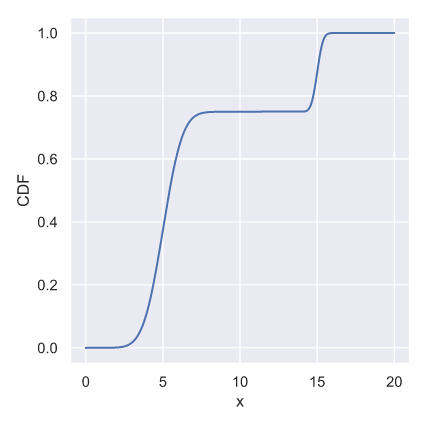

what is the probability that x is greater than 10?

Answer: 0.25. The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75. Thus, the probability that x > 10 is 0.25.

### Normal Distribution
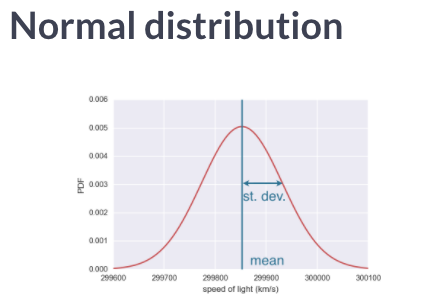

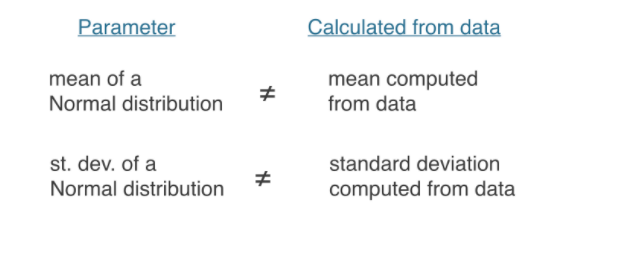

/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


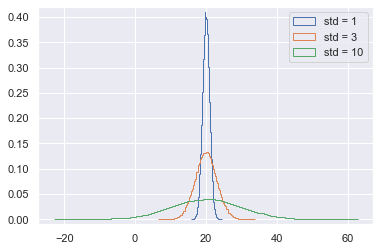

In [95]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, normed = True,histtype = 'step', bins = 100)
_ = plt.hist(samples_std3, normed = True,histtype = 'step', bins = 100)
_ = plt.hist(samples_std10, normed = True,histtype = 'step', bins = 100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


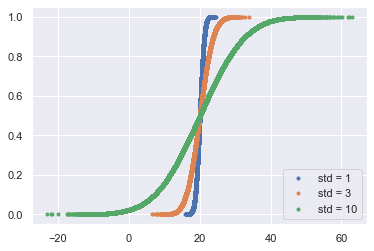

In [96]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The mean and median of normal distribution are equal!

#### Are the Belmont Stakes results Normally distributed?

In [199]:
belmont_no_outliers = pd.read_csv(file3)

In [192]:
belmont_no_outliers.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [173]:
belmont_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
Year       91 non-null int64
Winner     91 non-null object
Jockey     91 non-null object
Trainer    91 non-null object
Owner      91 non-null object
Time       91 non-null object
Track      91 non-null object
miles      91 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.8+ KB


In [174]:
import datetime

In [200]:
#IMPORTANT FOR DATA CLEANING. STRINGS TO SECONDS
belmont_no_outliers['Time'] = ['00:' + x for x in belmont_no_outliers['Time']]
belmont_no_outliers['Time'] = pd.to_timedelta(belmont_no_outliers['Time']).dt.total_seconds()

In [201]:
belmont_no_outliers.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,148.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",146.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,148.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,150.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,150.42,Belmont,1.5


In [202]:
belmont_no_outliers = np.array(belmont_no_outliers['Time'])

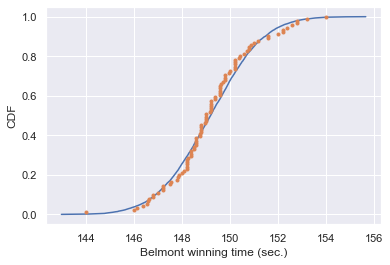

In [203]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma,size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [204]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.001509


#### The Exponential Distribution

The wait time between arrivals of a poisson process is exponentially distributed. Therefore if incidents in a dataset show exponential behavior, then the incidents can be modelled as a poisson process.

Remember: Poisson can give us a story of number of incidents, exponential can give us a story about time between incidents. 

**baseball example**: How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [205]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


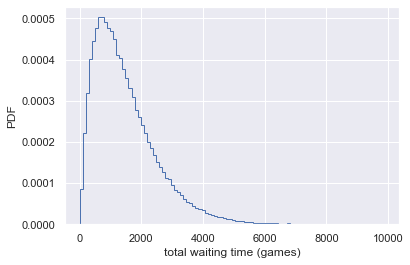

In [206]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


Notice that the PDF is peaked, unlike the waiting time for a single Poisson process.

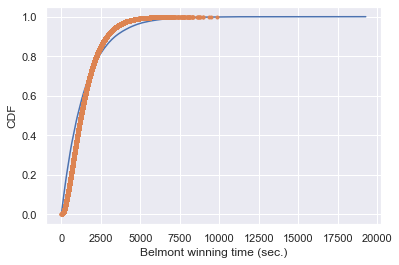

In [211]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(waiting_times)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.exponential(mu,size = 100000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(waiting_times)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

**Remember:** CDF can be more effective than Histogram to check for normality since there is no binning bias involved. 